In [3]:
using Revise, Sqra, Plots
Sqra.CACHE!()

(true, true)

In [4]:
#s0im = Simulation(x0 = Float32.(Sqra.x0gen), nsteps=1_000_000)
sim = Simulation(nsteps=50_000_000)
run(sim)

┌ Info: reading cache/sim_3953794533859111492.jld2
└ @ Sqra /home/htc/bzfsikor/code/Sqra.jl/src/permadict.jl:45


Simulation
  x0: Array{Float64}((6,)) [0.19920158482463968, 0.13789462153196408, -0.1709575705426315, 0.0784533378749835, 0.06778720715969005, -0.2112155752270007]
  epsilon: Int64 1
  r0: Float64 0.3333333333333333
  harm: Int64 1
  sigma: Float64 0.5
  dt: Float64 0.001
  nsteps: Int64 50000000
  maxdelta: Float64 0.1
  seed: Int64 1
  x: Array{Float64}((6, 50000000)) [0.20334321106184075 0.23323639105016725 … -0.06409212622819532 -0.03339064176686461; 0.14416632237604463 0.10459139091170935 … 0.034785662960763714 0.039558251554540964; … ; 0.053788009335393364 0.06679886031379578 … 0.28020717447428384 0.2525932059487459; -0.20596632763897224 -0.19111568330233175 … 0.21362595577517124 0.19742335061525623]
  u: Array{Float64}((50000000,)) [-2.7899344658297394, -2.0767964628456994, -1.8682213972516182, -2.0773918396090956, -2.3579304739127185, -2.8050196206903886, -2.506948656244679, -2.465898421806273, -2.587451882125607, -2.5008280857245433  …  -2.6611033301526206, -2.616799974683712,

In [5]:
levels = 2:20

r = Vector(undef, length(levels))

for (i,l) in enumerate(levels)
	@show l
	s = Setup(sim=sim, level=l)
	@time r[i] = Experiment(s)
end

l = 2


┌ Info: reading cache/exp_12122980500678892422.jld2
└ @ Sqra /home/htc/bzfsikor/code/Sqra.jl/src/permadict.jl:45


  8.235893 seconds (3.76 M allocations: 3.016 GiB, 13.06% gc time, 32.30% compilation time)
l = 3


┌ Info: reading cache/exp_18093337545382304266.jld2
└ @ Sqra /home/htc/bzfsikor/code/Sqra.jl/src/permadict.jl:45


  6.765218 seconds (15.19 k allocations: 2.795 GiB, 11.18% gc time)
l = 4


┌ Info: reading cache/exp_10367533014337300985.jld2
└ @ Sqra /home/htc/bzfsikor/code/Sqra.jl/src/permadict.jl:45


  6.271012 seconds (44.43 k allocations: 2.796 GiB, 12.21% gc time)
l = 5


┌ Info: reading cache/exp_161360592997481716.jld2
└ @ Sqra /home/htc/bzfsikor/code/Sqra.jl/src/permadict.jl:45


  6.001156 seconds (99.91 k allocations: 2.799 GiB, 12.56% gc time)
l = 6


┌ Info: reading cache/exp_16171833479708740323.jld2
└ @ Sqra /home/htc/bzfsikor/code/Sqra.jl/src/permadict.jl:45


  5.605875 seconds (191.82 k allocations: 2.803 GiB, 13.50% gc time)
l = 7


┌ Info: reading cache/exp_10512412211703961253.jld2
└ @ Sqra /home/htc/bzfsikor/code/Sqra.jl/src/permadict.jl:45


  5.656845 seconds (340.44 k allocations: 2.811 GiB, 13.51% gc time)
l = 8


┌ Info: reading cache/exp_7976295760977473100.jld2
└ @ Sqra /home/htc/bzfsikor/code/Sqra.jl/src/permadict.jl:45


  5.837590 seconds (607.23 k allocations: 2.822 GiB, 13.27% gc time)
l = 9


┌ Info: reading cache/exp_12840067835208579594.jld2
└ @ Sqra /home/htc/bzfsikor/code/Sqra.jl/src/permadict.jl:45


  5.780339 seconds (953.24 k allocations: 2.841 GiB, 13.67% gc time)
l = 10


┌ Info: reading cache/exp_11527471908412743047.jld2
└ @ Sqra /home/htc/bzfsikor/code/Sqra.jl/src/permadict.jl:45


  6.186673 seconds (1.31 M allocations: 2.856 GiB, 13.30% gc time)
l = 11


┌ Info: reading cache/exp_7378281742231432572.jld2
└ @ Sqra /home/htc/bzfsikor/code/Sqra.jl/src/permadict.jl:45


  5.648129 seconds (1.82 M allocations: 2.878 GiB, 14.94% gc time)
l = 12


┌ Info: reading cache/exp_5947385685605986249.jld2
└ @ Sqra /home/htc/bzfsikor/code/Sqra.jl/src/permadict.jl:45


  5.918725 seconds (2.57 M allocations: 2.911 GiB, 15.12% gc time)
l = 13


┌ Info: reading cache/exp_3498239224669550597.jld2
└ @ Sqra /home/htc/bzfsikor/code/Sqra.jl/src/permadict.jl:45


  6.166413 seconds (3.50 M allocations: 2.959 GiB, 15.66% gc time)
l = 14


┌ Info: reading cache/exp_12021810186492214401.jld2
└ @ Sqra /home/htc/bzfsikor/code/Sqra.jl/src/permadict.jl:45


  6.096722 seconds (4.44 M allocations: 3.000 GiB, 17.42% gc time)
l = 15


┌ Info: reading cache/exp_10829661124083396955.jld2
└ @ Sqra /home/htc/bzfsikor/code/Sqra.jl/src/permadict.jl:45


  7.385527 seconds (5.57 M allocations: 3.048 GiB, 21.94% gc time)
l = 16


┌ Info: reading cache/exp_18411395778439746430.jld2
└ @ Sqra /home/htc/bzfsikor/code/Sqra.jl/src/permadict.jl:45


  7.668336 seconds (7.04 M allocations: 3.128 GiB, 23.75% gc time)
l = 17


┌ Info: reading cache/exp_7477666358816043578.jld2
└ @ Sqra /home/htc/bzfsikor/code/Sqra.jl/src/permadict.jl:45


  8.136061 seconds (8.79 M allocations: 3.203 GiB, 25.46% gc time)
l = 18


┌ Info: reading cache/exp_16946486465832636126.jld2
└ @ Sqra /home/htc/bzfsikor/code/Sqra.jl/src/permadict.jl:45


  8.455196 seconds (10.65 M allocations: 3.282 GiB, 28.65% gc time)
l = 19


┌ Info: reading cache/exp_2202868864072489731.jld2
└ @ Sqra /home/htc/bzfsikor/code/Sqra.jl/src/permadict.jl:45


  9.085711 seconds (12.68 M allocations: 3.402 GiB, 29.73% gc time)
l = 20


┌ Info: reading cache/sim_3953794533859111492.jld2
└ @ Sqra /home/htc/bzfsikor/code/Sqra.jl/src/permadict.jl:45
┌ Warning: Committor computation did not converge
└ @ Sqra /home/htc/bzfsikor/code/Sqra.jl/src/experiment.jl:175


Committor residual mean: 0.00010316191435484655


┌ Info: writing cache/exp_17849665512271205627.jld2
└ @ Sqra /home/htc/bzfsikor/code/Sqra.jl/src/permadict.jl:50


2322.876792 seconds (194.13 M allocations: 20.814 GiB, 2.15% gc time, 0.63% compilation time)


In [15]:
L = length(r)
errs = fill(NaN,L,L)
for j in 2:L
	for i in 1:j-1
		errs[i,j] = Sqra.error(r[j], r[i])
	end
end
errs

19×19 Matrix{Float64}:
 NaN    0.42322    0.319279    0.363264  …    0.288454       0.281289
 NaN  NaN          0.356674    0.266007       0.294238       0.296203
 NaN  NaN        NaN           0.238803       0.1273         0.114003
 NaN  NaN        NaN         NaN              0.0438952      0.0210858
 NaN  NaN        NaN         NaN              0.0103155      0.00544742
 NaN  NaN        NaN         NaN         …    0.00154767     0.00210176
 NaN  NaN        NaN         NaN              0.00106706     0.000936522
 NaN  NaN        NaN         NaN              0.000869305    0.000682922
 NaN  NaN        NaN         NaN              0.000603217    0.000342957
 NaN  NaN        NaN         NaN              0.000427995    0.000372988
 NaN  NaN        NaN         NaN         …    0.000347953    0.000319351
 NaN  NaN        NaN         NaN              0.00032093     0.000309007
 NaN  NaN        NaN         NaN              0.000258273    0.00023713
 NaN  NaN        NaN         NaN          

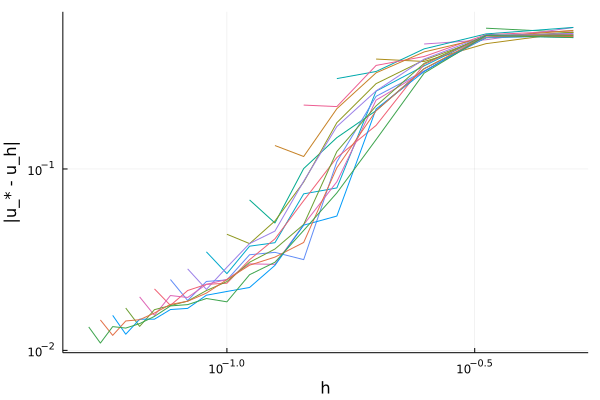

In [53]:
plot(1 ./levels[1:end], sqrt.(errs))
#lot(levels[1:end], sqrt.(errs))
yaxis!(:log)
xaxis!(:log)
xlabel!("h")
ylabel!("|u_* - u_h|")
plot!(legend=false)
xticks!([0.1, sqrt(0.1)])

In [38]:
sb = r[end].sb

Sqra.SparseBoxesDict{DataStructures.SortedDict{StaticArrays.SVector{6, Int64}, Vector{UInt32}, Base.Order.ForwardOrdering}}(20, [-0.8 0.8; -0.8 0.8; … ; -0.8 0.8; -0.8 0.8], DataStructures.SortedDict{StaticArrays.SVector{6, Int64}, Vector{UInt32}, Base.Order.ForwardOrdering}([1, 6, 2, 11, 6, 8] => [0x01f6db52, 0x01f6db53, 0x01f6db54], [1, 6, 2, 11, 6, 9] => [0x01f6db55], [1, 6, 2, 13, 6, 9] => [0x01f6db81], [1, 6, 3, 10, 6, 6] => [0x01f6db40], [1, 6, 3, 10, 6, 7] => [0x01f6db44, 0x01f6db45], [1, 6, 3, 11, 6, 7] => [0x01f6db42, 0x01f6db43, 0x01f6db46, 0x01f6db47, 0x01f6db49, 0x01f6db4c], [1, 6, 3, 11, 7, 7] => [0x01f6db3e, 0x01f6db41], [1, 6, 4, 2, 7, 7] => [0x00e42304], [1, 6, 4, 11, 7, 6] => [0x01f6db3f], [1, 6, 4, 12, 7, 8] => [0x00b6e418]…))

In [44]:
length(sb.dict)

832943